C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


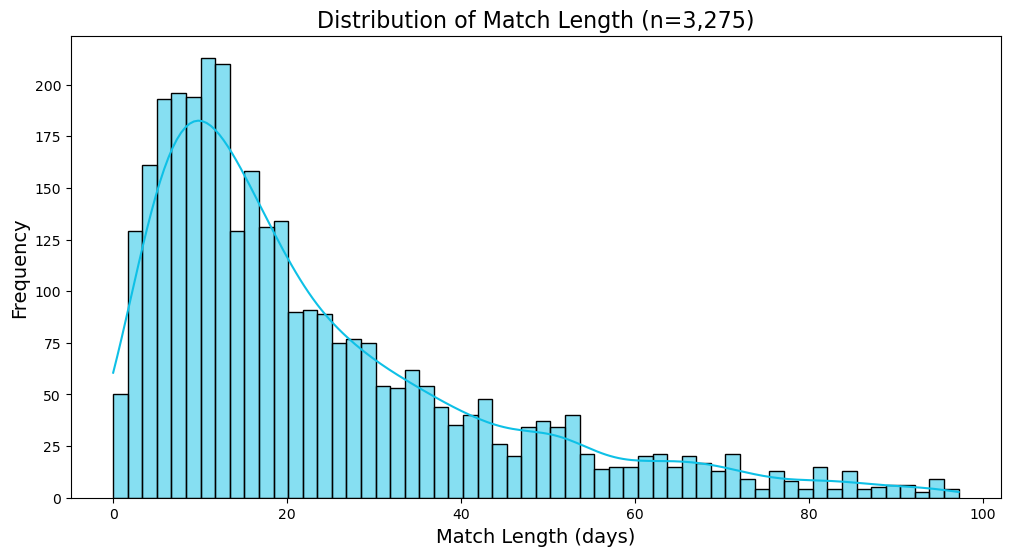

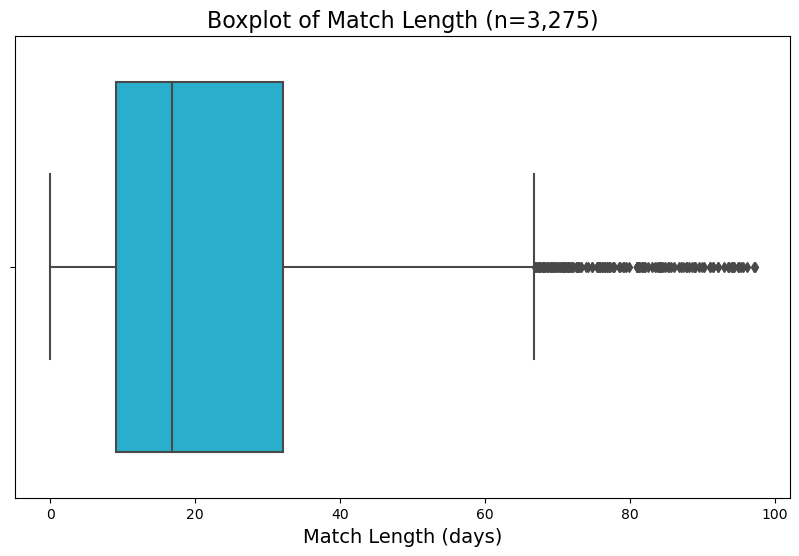

Skewness of Match Length: 1.39
Kurtosis of Match Length: 1.53
Mean of Match Length: 23.38 days
Median of Match Length: 16.80 days


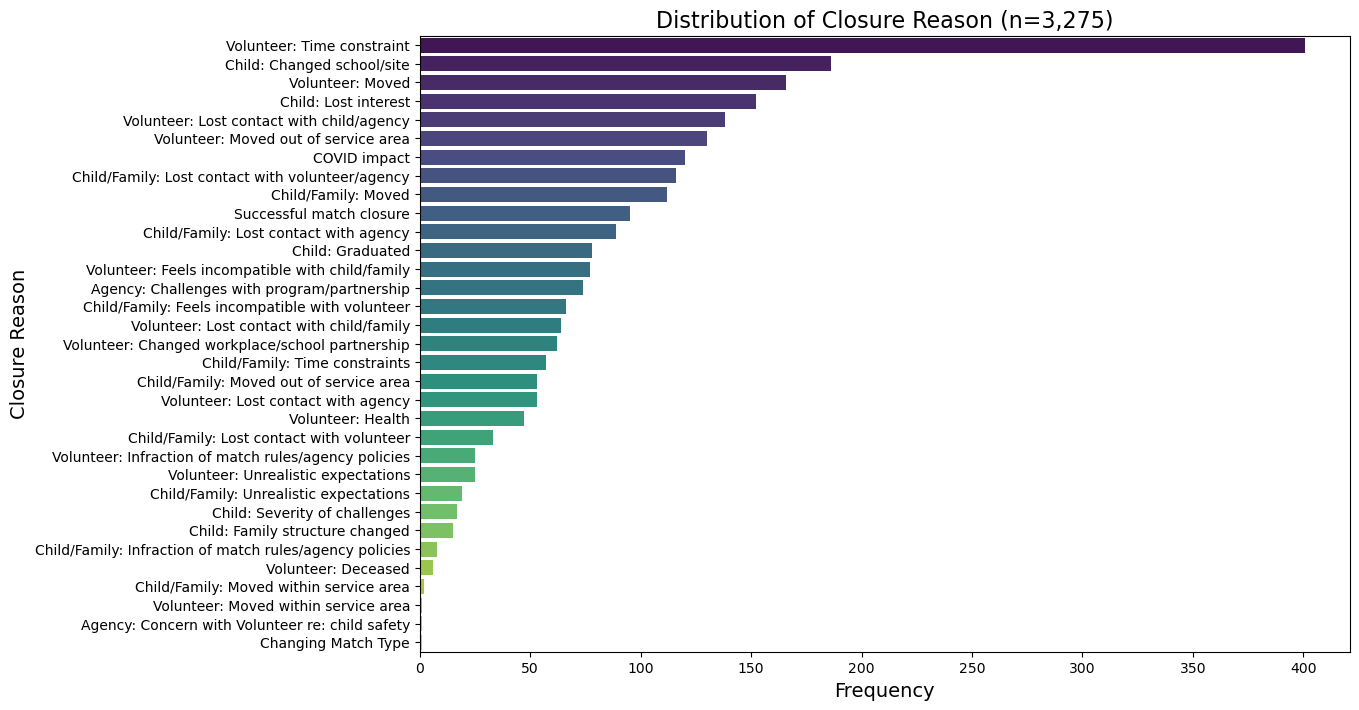

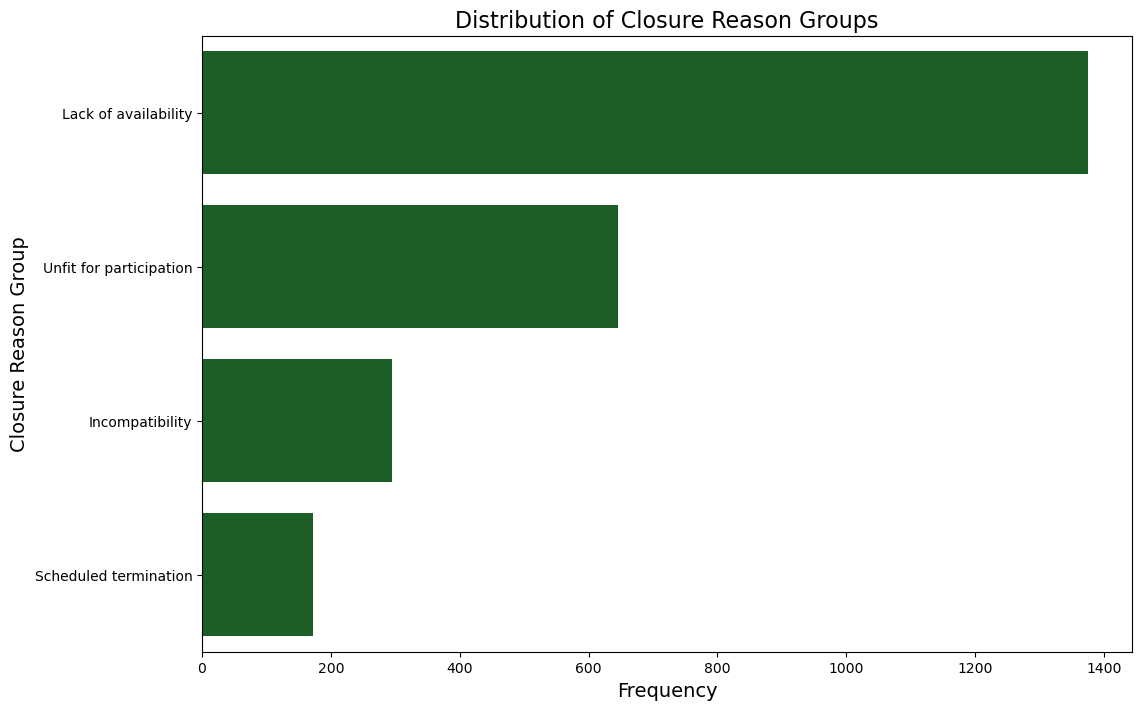

Missing values:
 Match Length        0
Big Occupation    325
dtype: int64
Summary Statistics by Big Occupation:
                                  mean  median        std  count
Big Occupation                                                  
Agriculture                  22.600000   18.55  17.754758      8
Architect                    27.988889   28.10  13.140153      9
Arts, Entertainment, Sports  30.288333   23.55  25.234588     60
Barber/Hairstylist           50.766667   57.30  42.379398      3
Business                     24.475735   18.20  19.890726    136
...                                ...     ...        ...    ...
Transport: Flight Attendant  22.200000   22.50  13.186167      5
Transport: Mechanic          10.200000   10.20        NaN      1
Transport: Pilot             21.337500   20.85   7.750380      8
Unemployed                   19.938462   14.50  13.603002     26
Unknown                      29.036126   22.90  21.714027    191

[87 rows x 4 columns]


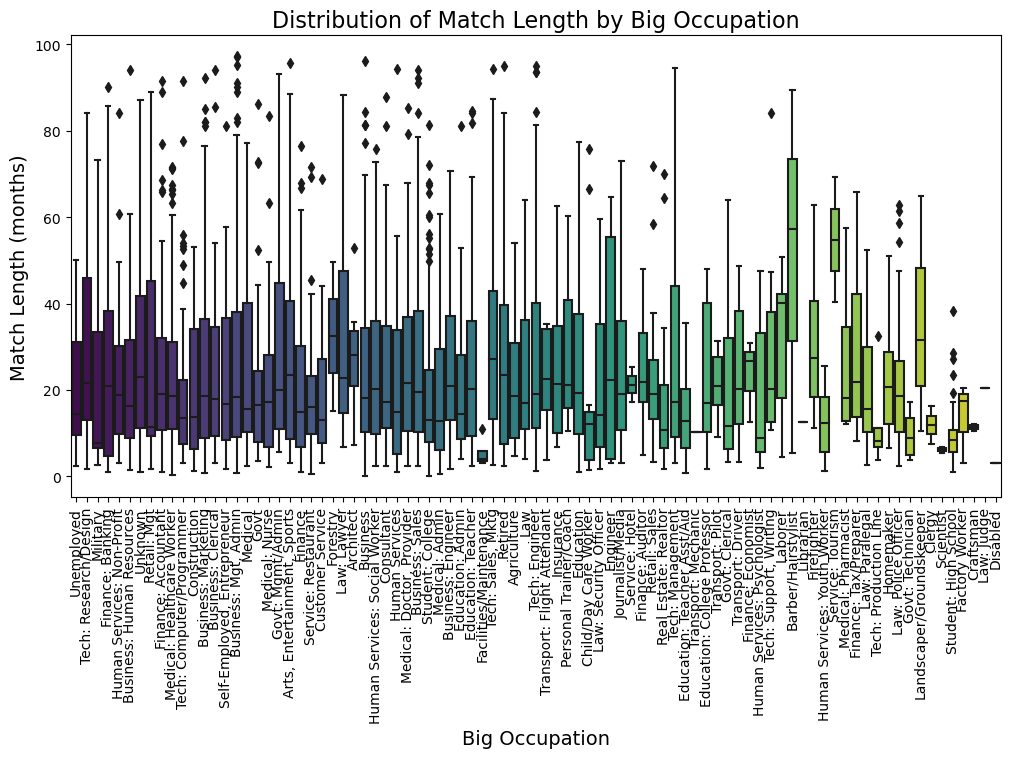

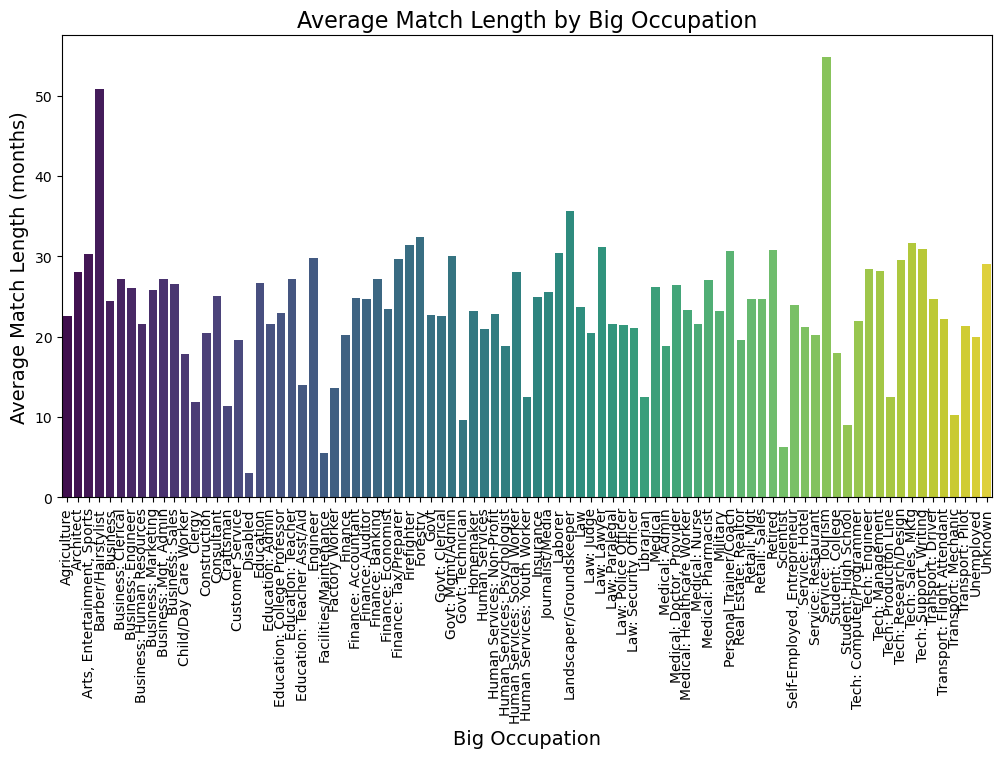

Missing values:
 Match Length        0
Big Occupation    325
dtype: int64
Filtered Occupations and Counts:
 Big Occupation Filtered
Student: College                 375
Unknown                          191
Other                            175
Business: Marketing              157
Medical: Healthcare Worker       136
Business                         136
Student: High School             125
Business: Mgt, Admin             124
Business: Sales                  110
Finance                           89
Tech: Engineer                    79
Education                         74
Finance: Accountant               61
Arts, Entertainment, Sports       60
Business: Human Resources         54
Law: Police Officer               52
Consultant                        47
Education: Teacher                45
Tech: Computer/Programmer         43
Medical                           42
Human Services: Non-Profit        38
Govt                              34
Medical: Doctor, Provider         34
Law: Lawyer      

C:\Users\wzhon\AppData\Local\Temp\ipykernel_39128\3676865023.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Big Occupation Filtered'] = df_clean['Big Occupation'].apply(
C:\Users\wzhon\AppData\Local\Temp\ipykernel_39128\3676865023.py:129: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Big Occupation Filtered', y='Match Length', data=df_clean, palette='viridis', jitter=True, size=4)
C:\Users\wzhon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wzhon\anaconda3\lib\site-packages\s

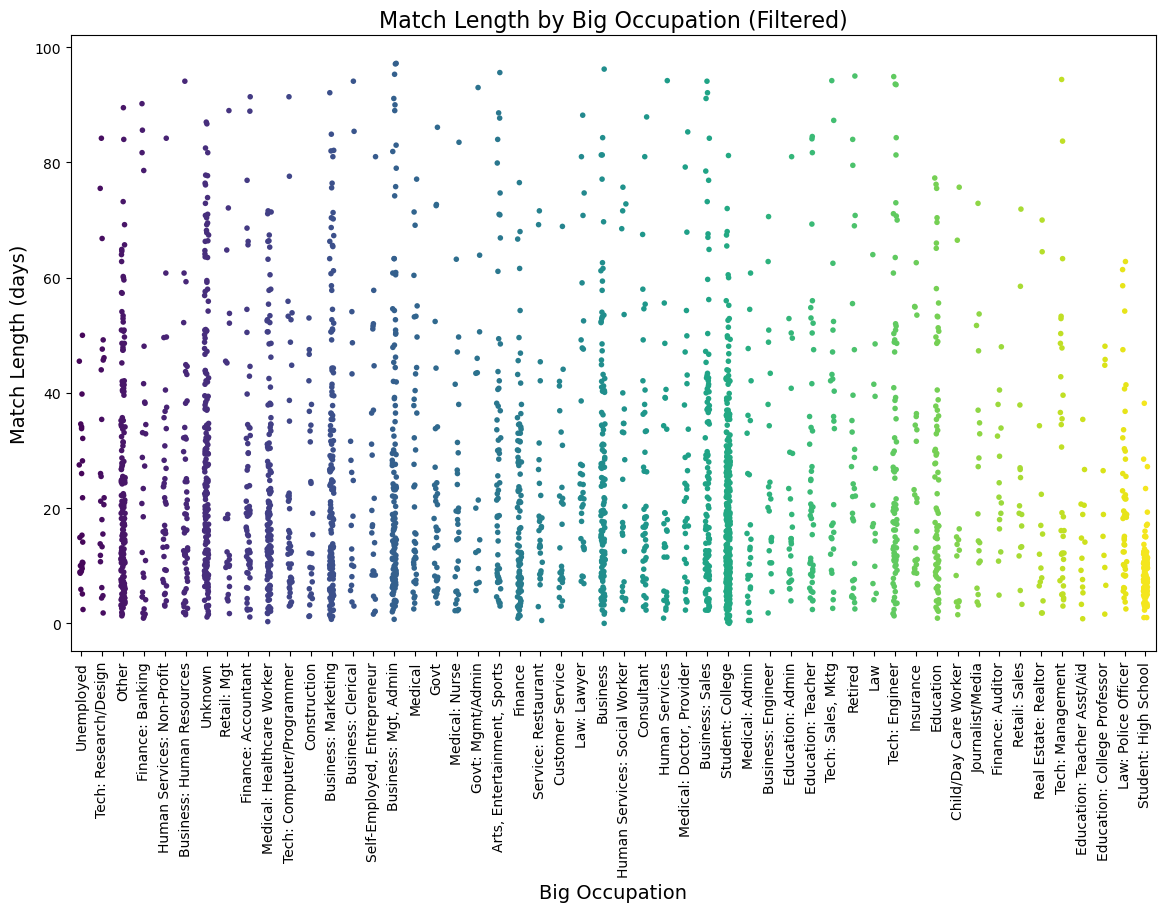

Missing values:
 Match Length        0
Big Occupation    325
dtype: int64
Top 10 Occupations with Longest Median Match Length:
                             median       mean  count
Big Occupation Filtered                              
Tech: Sales, Mktg             27.20  31.634615     26
Arts, Entertainment, Sports   23.55  30.288333     60
Retired                       23.40  30.817241     29
Unknown                       22.90  29.036126    191
Law: Lawyer                   22.70  31.169697     33
Finance: Auditor              21.90  24.713333     15
Tech: Research/Design         21.50  29.579167     24
Medical: Doctor, Provider     21.50  26.458824     34
Insurance                     21.35  24.895833     24
Business: Engineer            20.85  26.081818     22


C:\Users\wzhon\AppData\Local\Temp\ipykernel_39128\3676865023.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Big Occupation Filtered'] = df_clean['Big Occupation'].apply(


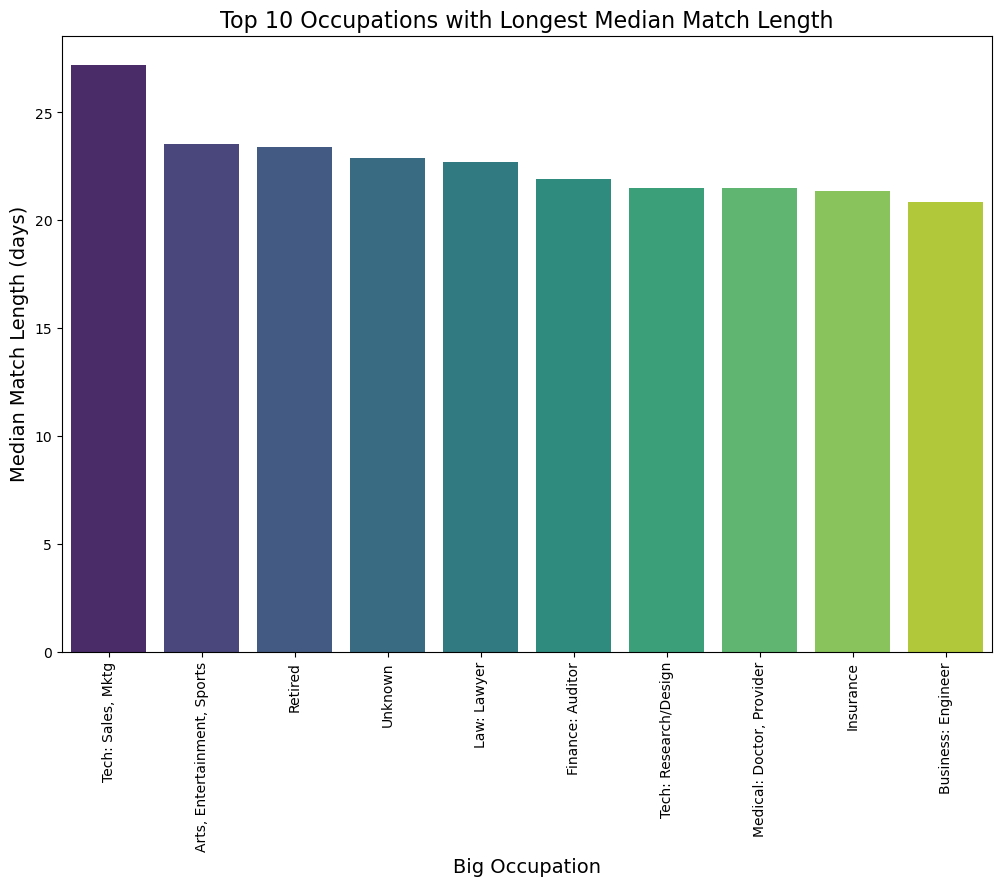

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pointbiserialr, f_oneway, kruskal, mannwhitneyu
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests


df = pd.read_csv('new_novice-Copy1.csv')

#Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Match Length'], kde=True, bins=58, color=(0.055, 0.753, 0.902))
plt.title('Distribution of Match Length (n=3,275)', fontsize=16)
plt.xlabel('Match Length (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

#Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Match Length'], color=(0.055, 0.753, 0.902))
plt.title('Boxplot of Match Length (n=3,275)', fontsize=16)
plt.xlabel('Match Length (days)', fontsize=14)
plt.show()

#Skewness and Kurtosis
skewness = df['Match Length'].skew()
kurtosis = df['Match Length'].kurtosis()
print(f"Skewness of Match Length: {skewness:.2f}")
print(f"Kurtosis of Match Length: {kurtosis:.2f}")

# Mean and Median
mean_match_length = df['Match Length'].mean()
median_match_length = df['Match Length'].median()
print(f"Mean of Match Length: {mean_match_length:.2f} days")
print(f"Median of Match Length: {median_match_length:.2f} days")

#-----------------------------------------------------------------------
#Distribution of closure reasons
missing_values = df['Closure Reason'].isnull().sum()
#print(f"Missing values in 'Closure Reason': {missing_values}")

# Frequency distribution of Closure Reason
closure_reason_counts = df['Closure Reason'].value_counts()
closure_reason_percentages = df['Closure Reason'].value_counts(normalize=True) * 100

#print("Frequency Distribution of Closure Reason:")
#print(closure_reason_counts)
#print("\nPercentage Distribution of Closure Reason:")
#print(closure_reason_percentages)

# Plot
plt.figure(figsize=(12, 8))
sns.countplot(y=df['Closure Reason'], order=closure_reason_counts.index, palette='viridis')
plt.title('Distribution of Closure Reason (n=3,275)', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Closure Reason', fontsize=14)
plt.show()

#-----------------------------------------------------------------------
#Distribution of closure reason groups
missing_values = df['closure_reason_grp'].isnull().sum()
#print(f"Missing values in 'Closure Reason': {missing_values}")

# Frequency distribution of Closure Reason
closure_reason_counts = df['closure_reason_grp'].value_counts()
closure_reason_percentages = df['closure_reason_grp'].value_counts(normalize=True) * 100

#print("Frequency Distribution of Closure Reason:")
#print(closure_reason_counts)
#print("\nPercentage Distribution of Closure Reason:")
#print(closure_reason_percentages)

# Plot
plt.figure(figsize=(12, 8))
sns.countplot(y=df['closure_reason_grp'], order=closure_reason_counts.index, color=(0.07059, 0.41176, 0.12157))
plt.title('Distribution of Closure Reason Groups', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Closure Reason Group', fontsize=14)
plt.show()
#------------------------------------------------------------------------
#Correlation of Match Days to Big Occupation
missing_values = df[['Match Length', 'Big Occupation']].isnull().sum()
print("Missing values:\n", missing_values)

# Drop rows with missing values in 'Match Length' or 'Big Occupation'
df_clean = df.dropna(subset=['Match Length', 'Big Occupation'])

# Group by 'Big Occupation' and calculate summary statistics
grouped_stats = df_clean.groupby('Big Occupation')['Match Length'].agg(['mean', 'median', 'std', 'count'])
print("Summary Statistics by Big Occupation:")
print(grouped_stats)

#Distribution of Match Length by Big Occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='Big Occupation', y='Match Length', data=df_clean, palette='viridis')
plt.title('Distribution of Match Length by Big Occupation', fontsize=16)
plt.xlabel('Big Occupation', fontsize=14)
plt.ylabel('Match Length (months)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

#Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=grouped_stats.index, y=grouped_stats['mean'], palette='viridis')
plt.title('Average Match Length by Big Occupation', fontsize=16)
plt.xlabel('Big Occupation', fontsize=14)
plt.ylabel('Average Match Length (months)', fontsize=14)
plt.xticks(rotation=90)
plt.show()
#-----------------------------------------------------------------------------
missing_values = df[['Match Length', 'Big Occupation']].isnull().sum()
print("Missing values:\n", missing_values)
df_clean = df.dropna(subset=['Match Length', 'Big Occupation'])

#Filter 
occupation_counts = df_clean['Big Occupation'].value_counts()
threshold = 10
filtered_occupations = occupation_counts[occupation_counts >= threshold].index
df_clean['Big Occupation Filtered'] = df_clean['Big Occupation'].apply(
    lambda x: x if x in filtered_occupations else 'Other'
)

#Display
print("Filtered Occupations and Counts:\n", df_clean['Big Occupation Filtered'].value_counts())

plt.figure(figsize=(14, 8))
sns.stripplot(x='Big Occupation Filtered', y='Match Length', data=df_clean, palette='viridis', jitter=True, size=4)
plt.title('Match Length by Big Occupation (Filtered)', fontsize=16)
plt.xlabel('Big Occupation', fontsize=14)
plt.ylabel('Match Length (days)', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#---------------------------------------------------------------------------------------
#Box Plot
missing_values = df[['Match Length', 'Big Occupation']].isnull().sum()
print("Missing values:\n", missing_values)
df_clean = df.dropna(subset=['Match Length', 'Big Occupation'])
occupation_counts = df_clean['Big Occupation'].value_counts()
threshold = 10
filtered_occupations = occupation_counts[occupation_counts >= threshold].index

df_clean['Big Occupation Filtered'] = df_clean['Big Occupation'].apply(
    lambda x: x if x in filtered_occupations else 'Other'
)

match_length_stats = df_clean.groupby('Big Occupation Filtered')['Match Length'].agg(['median', 'mean', 'count'])

# Sort
match_length_stats_sorted = match_length_stats.sort_values(by='median', ascending=False)

# Display
print("Top 10 Occupations with Longest Median Match Length:")
print(match_length_stats_sorted.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x=match_length_stats_sorted.index[:10], y=match_length_stats_sorted['median'][:10], palette='viridis')
plt.title('Top 10 Occupations with Longest Median Match Length', fontsize=16)
plt.xlabel('Big Occupation', fontsize=14)
plt.ylabel('Median Match Length (days)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Best Hyperparameters: OrderedDict([('regressor__max_depth', 24), ('regressor__max_features', 'sqrt'), ('regressor__min_samples_leaf', 3), ('regressor__min_samples_split', 20), ('regressor__n_estimators', 300)])
Mean Squared Error with Best Model: 353.51
R^2 Score with Best Model: 0.10
Cross-Validation MSE: 387.89 (±201.11)


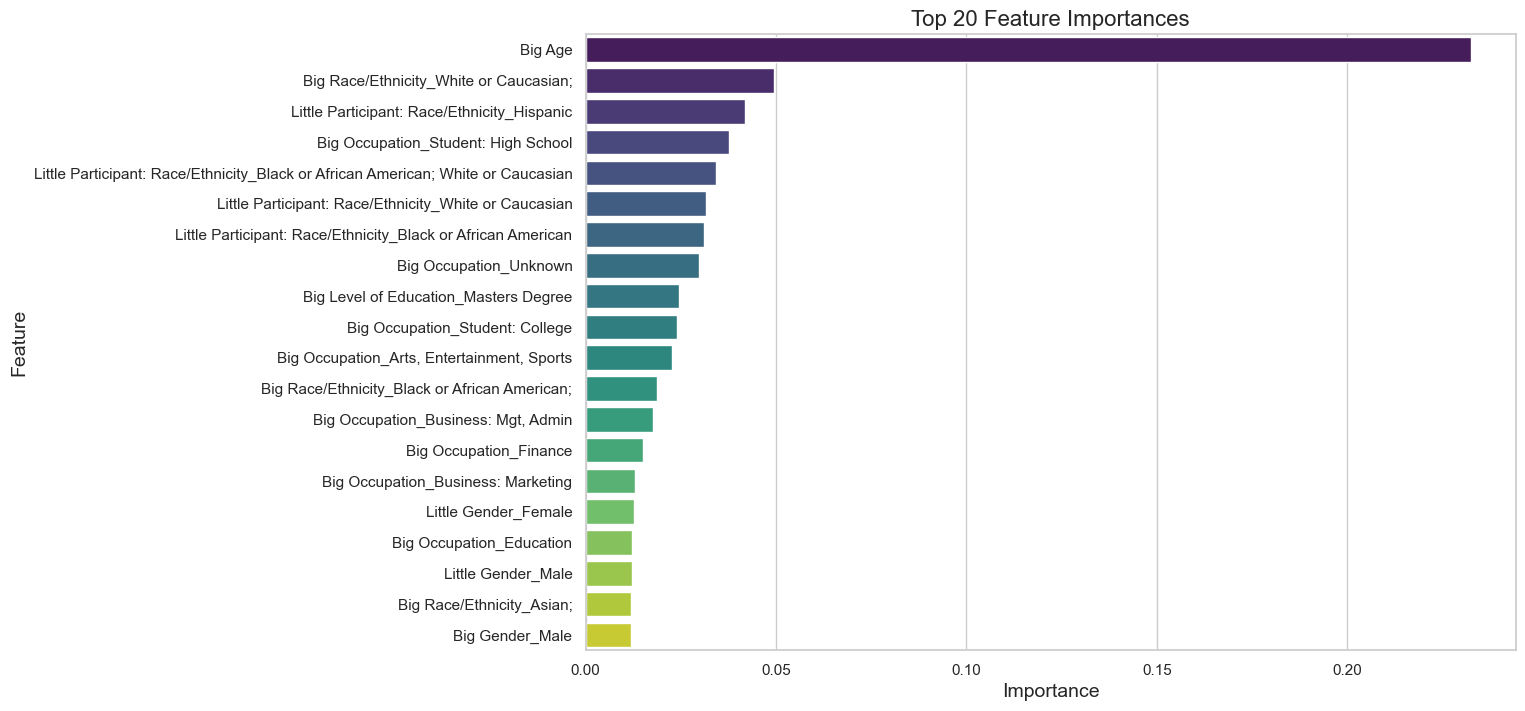

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
df = pd.read_csv('novice.csv')

target = 'Match Length'
features = ['Big Occupation', 'Big Age', 'Big Gender', 'Big Level of Education', 
            'Big Race/Ethnicity', 'Little Gender', 'Little Participant: Race/Ethnicity']

df_clean = df.dropna(subset=[target])
X = df_clean[features]
y = df_clean[target]
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing steps:
# 1. Impute missing values:
#    - For numerical features: Use the median.
#    - For categorical features: Use the most frequent value.
# 2. One-hot encode categorical variables.
# 3. Scale numerical variables.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),  
            ('scaler', StandardScaler()) 
        ]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

rf = RandomForestRegressor(random_state=1)
#Parameters
param_space = {
    'regressor__n_estimators': Integer(50, 300),  #Number of trees
    'regressor__max_depth': Integer(5, 50),       #Maximum depth of trees
    'regressor__min_samples_split': Integer(2, 20),  #Minimum samples to split a node
    'regressor__min_samples_leaf': Integer(1, 10),   #Minimum samples at a leaf node
    'regressor__max_features': Categorical(['auto', 'sqrt', 'log2'])  #Number of features to consider
}

#Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', rf)
])

#BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    n_iter=50,  
    cv=5,       
    scoring='neg_mean_squared_error',
    random_state=1,
    n_jobs=-1
)

#Fit to the training data
bayes_search.fit(X_train, y_train)
 
#Get best parameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error with Best Model: {mse:.2f}")
print(f"R^2 Score with Best Model: {r2:.2f}")

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-cv_scores.mean():.2f} (±{cv_scores.std():.2f})")

if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
    importances = best_model.named_steps['regressor'].feature_importances_
    feature_names = np.concatenate([numerical_features, best_model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)])
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), palette='viridis')
    plt.title('Top 20 Feature Importances', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.show()

      Match ID 18Char   Stage           Little ID           Big ID  \
0  a1v2J0000028pRvQAI  Closed  0032J00003PLe29QAD  0032J00003PhDOI   
1  a1v2J000002uR0JQAU  Closed  0032J00003PfZ6OQAV  0032J00003PgoV1   
2  a1v2J0000027NsOQAU  Closed  0032J00003PLeoRQAT  0032J00003Ph0MT   
3  a1v2J0000027dtOQAQ  Active  0032J00003PLeoRQAT  0032J00003Ph14N   
4  a1v2J0000028enKQAQ  Closed  0032J00003PfZ6QQAV  0032J00003Ph14j   

   Big County  Big Age              Big Occupation Big: Military  \
0    Hennepin       40                  Unemployed           NaN   
1  Washington       65       Tech: Research/Design           NaN   
2      Ramsey       45                    Military           NaN   
3    Hennepin       61            Finance: Banking           NaN   
4      Ramsey       29  Human Services: Non-Profit           NaN   

     Big Approved Date Big Level of Education  ...  \
0                  NaN         Masters Degree  ...   
1  2018-04-11 00:00:00                    NaN  ...   
2       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


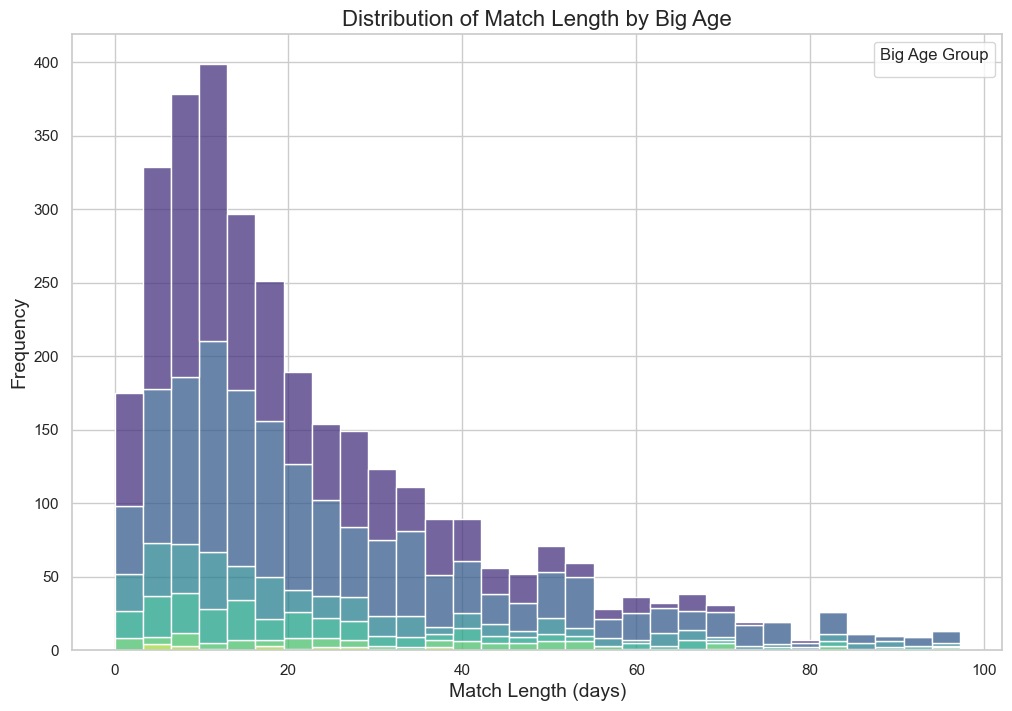

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('novice.csv')
sns.set(style="whitegrid")

df = pd.read_csv('novice.csv')
print(df.head())
missing_values = df[['Match Length', 'Big Age']].isnull().sum()
print("Missing values:\n", missing_values)
df_clean = df.dropna(subset=['Match Length', 'Big Age'])

age_bins = [20, 30, 40, 50, 60, 70, 80] #Could change
df_clean['Age Group'] = pd.cut(df_clean['Big Age'], bins=age_bins)

plt.figure(figsize=(12, 8))
sns.histplot(data=df_clean, x='Match Length', hue='Age Group', multiple='stack', palette='viridis', bins=30)
plt.title('Distribution of Match Length by Big Age', fontsize=16)
plt.xlabel('Match Length (days)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Big Age Group')
plt.show()

In [6]:
!pip install scikit-optimize

     -------------------------------------- 107.8/107.8 kB 2.1 MB/s eta 0:00:00
